In [1]:
import numpy as np
from obj_func import obj_func
from read_instance import read_instance
import random
import seaborn as sns
from random import randint
import sys 

In [436]:
file=open(r"E:\monit\Documents\TTP\Instancias\a280-ttp\a280_n279_bounded-strongly-corr_01.ttp","r")
#file=open(r"E:\monit\Documents\TTP\Instancias\a280-ttp\my_test.ttp","r")
dic=read_instance(file)


In [415]:
def create_knap_pop(dic,c):
    pop_knap=np.zeros((c,dic["number of items"]))
    for i in range(pop_knap.shape[0]):
        item_pick=[]
        for x in range(dic["number of items"]): 
            item_pick.append(random.randint(0, 1))
        item_pick2=np.array(item_pick)
        pop_knap[i]=item_pick2
    return pop_knap

In [348]:
def create_distance_matrix(dic):
    chords=dic["coords citites"]
    matrix=np.zeros((len(chords),len(chords)))
    ind1=0
    for x in chords:
        ind2=0
        for f in chords:
            point1=np.array((int(x[0]),int(x[1])))
            point2=np.array((int(f[0]),int(f[1])))
            matrix[ind1,ind2]=np.linalg.norm(point1-point2)
            ind2=ind2+1
        ind1=ind1+1
    return matrix

In [349]:
def create_tsp_pop(dic,x,matrix):
    pop_tsp=np.zeros((x,dic["number cities"]-1))
    minimo=np.amin(matrix[matrix>0])
    maximo=np.amax(matrix[matrix>0])
    #print(minimo,maximo,pop_tsp.shape[1])
    for i in range(pop_tsp.shape[0]):
        #order_cities=list(range(2,dic["number cities"]+1 ))
        dist=(maximo-minimo) * np.random.random_sample((pop_tsp.shape[1] )) +minimo    
        pop_tsp[i,:]=dist
    return pop_tsp

In [451]:
def cont_to_disc_tsp(dic,pop_tsp,matrix):
    pop_tsp_disc=np.zeros((pop_tsp.shape))
    matrix[:,0]=0
 
    for x in range(pop_tsp.shape[0]):
        line_check=matrix[0,:].copy()
        orden=[]
        for i in pop_tsp[x,:]:
            #print(i,"i")
            diff=abs(line_check-i)
            pick_list=list(zip(*np.where(diff==np.amin(diff))))
            #pick= int(random.choice(pick_list)[0])
            pick=int(pick_list[0][0])
            orden.append(pick+1)
            line_check=matrix[pick,:].copy()
            for l in orden:
                line_check[l-1]=0
            #print(diff,"diff")
            #print(pick,'city')
            #print(line_check,"newline'")
        #print(orden,"orden_ciudades",len(set(orden)),"unicos",len(orden),'largo del orden')
        pop_tsp_disc[x,:]=orden
    return pop_tsp_disc


In [351]:
def fit_loop(dic,pop_tsp,pop_knap):
    fitness=np.zeros((pop_tsp.shape[0]))
    for l in range(pop_tsp.shape[0]):
        fitness[l]=obj_func(dic,pop_tsp[l,:],pop_knap[l,:])
    return fitness

In [443]:
import numpy as np
import random


def diff_evolution(fitness,pop_tsp,pop_knap,f,r,matrix,dic):
    dim=np.shape(pop_tsp)[0]
    minimo=np.amin(matrix[matrix>0])
    maximo=np.amax(matrix[matrix>0])
    new_population_tsp=np.zeros(np.shape(pop_tsp))
    new_population_knap=np.zeros(np.shape(pop_knap))
    for k in range(dim): 
        if random.uniform(0,1)>r :
            selector=random.sample(range(dim), 3)
            #print(selector)
            #diff evolution for tsp
            pre_pop_tsp=pop_tsp[2].copy()  + (f*(pop_tsp[selector[0]].copy()-pop_tsp[selector[1]].copy()))
            pre_pop_tsp=np.reshape(np.clip(pre_pop_tsp,minimo,maximo),(1,pre_pop_tsp.shape[0]))
            pre_pop_tsp_fit=(cont_to_disc_tsp(dic,pre_pop_tsp,matrix)).astype(np.int32)
            #print(pre_pop_tsp_fit,cont_to_disc_tsp(dic,np.reshape(pop_tsp[k,:],(1,pop_tsp.shape[1])),matrix))
           
            #diff evolution for knap, bin dif evolutio
            pre_nap=pop_knap[selector[0],:].copy()
            #print(pop_knap[selector[0],:],"before")
            #print(pop_knap[selector[1],:],pop_knap[selector[2],:],"bins")
            for l in range(pop_knap.shape[1]):
                if pop_knap[selector[1],l]!=pop_knap[selector[2],l] and random.uniform(0,1)>f:
                    pre_nap[l]=1-pre_nap[l]
            #print(pre_nap,'after')
            fitness1=fitness[k]
            fitness2=obj_func(dic,pre_pop_tsp_fit[0,:],pre_nap)            
            if fitness2>fitness1:
                new_population_tsp[k,:]=np.reshape(pre_pop_tsp,(pre_pop_tsp.shape[1]))
                new_population_knap[k,:]=pre_nap
            else:
                new_population_tsp[k,:]=pop_tsp[k,:]
                new_population_knap[k,:]=pop_knap[k,:]
        else:
            new_population_tsp[k,:]=pop_tsp[k,:]
            new_population_knap[k,:]=pop_knap[k,:]
        #print(fitness1,fitness2)
    
     
    return new_population_tsp,new_population_knap
    
    

generation:  0  maximo:  -1460814.255855598
generation:  1  maximo:  -1460814.255855598
generation:  2  maximo:  -1460814.255855598
generation:  3  maximo:  -1460814.255855598
generation:  4  maximo:  -1460814.255855598
generation:  5  maximo:  -1460814.255855598
generation:  6  maximo:  -1460814.255855598
generation:  7  maximo:  -1460814.255855598
generation:  8  maximo:  -1460814.255855598
generation:  9  maximo:  -1460814.255855598
generation:  10  maximo:  -1460814.255855598
generation:  11  maximo:  -1460814.255855598
generation:  12  maximo:  -1378890.9528815637
generation:  13  maximo:  -1378890.9528815637
generation:  14  maximo:  -1378890.9528815637
generation:  15  maximo:  -1378890.9528815637
generation:  16  maximo:  -1331921.9051065827
generation:  17  maximo:  -1265111.155099844
generation:  18  maximo:  -1265111.155099844
generation:  19  maximo:  -1265111.155099844
generation:  20  maximo:  -1265111.155099844
generation:  21  maximo:  -1265111.155099844
generation:  22

generation:  178  maximo:  -1152349.7279874864
generation:  179  maximo:  -1152349.7279874864
generation:  180  maximo:  -1152349.7279874864
generation:  181  maximo:  -1152349.7279874864
generation:  182  maximo:  -1152349.7279874864
generation:  183  maximo:  -1152349.7279874864
generation:  184  maximo:  -1152349.7279874864
generation:  185  maximo:  -1152349.7279874864
generation:  186  maximo:  -1152349.7279874864
generation:  187  maximo:  -1152349.7279874864
generation:  188  maximo:  -1152349.7279874864
generation:  189  maximo:  -1152349.7279874864
generation:  190  maximo:  -1152349.7279874864
generation:  191  maximo:  -1152349.7279874864
generation:  192  maximo:  -1152349.7279874864
generation:  193  maximo:  -1152349.7279874864
generation:  194  maximo:  -1152349.7279874864
generation:  195  maximo:  -1152349.7279874864
generation:  196  maximo:  -1152349.7279874864
generation:  197  maximo:  -1152349.7279874864
generation:  198  maximo:  -1152349.7279874864
generation:  

generation:  354  maximo:  -953677.0317804189
generation:  355  maximo:  -953677.0317804189
generation:  356  maximo:  -953677.0317804189
generation:  357  maximo:  -953677.0317804189
generation:  358  maximo:  -953677.0317804189
generation:  359  maximo:  -953677.0317804189
generation:  360  maximo:  -953677.0317804189
generation:  361  maximo:  -901956.9074829466
generation:  362  maximo:  -901956.9074829466
generation:  363  maximo:  -901956.9074829466
generation:  364  maximo:  -901956.9074829466
generation:  365  maximo:  -901956.9074829466
generation:  366  maximo:  -901956.9074829466
generation:  367  maximo:  -901956.9074829466
generation:  368  maximo:  -901956.9074829466
generation:  369  maximo:  -901956.9074829466
generation:  370  maximo:  -901956.9074829466
generation:  371  maximo:  -901956.9074829466
generation:  372  maximo:  -901956.9074829466
generation:  373  maximo:  -901956.9074829466
generation:  374  maximo:  -901956.9074829466
generation:  375  maximo:  -901956

generation:  533  maximo:  -777645.4270799034
generation:  534  maximo:  -777645.4270799034
generation:  535  maximo:  -777645.4270799034
generation:  536  maximo:  -777645.4270799034
generation:  537  maximo:  -777645.4270799034
generation:  538  maximo:  -777645.4270799034
generation:  539  maximo:  -777645.4270799034
generation:  540  maximo:  -777645.4270799034
generation:  541  maximo:  -777645.4270799034
generation:  542  maximo:  -777645.4270799034
generation:  543  maximo:  -777645.4270799034
generation:  544  maximo:  -777645.4270799034
generation:  545  maximo:  -777645.4270799034
generation:  546  maximo:  -777645.4270799034
generation:  547  maximo:  -777645.4270799034
generation:  548  maximo:  -777645.4270799034
generation:  549  maximo:  -777645.4270799034
generation:  550  maximo:  -777645.4270799034
generation:  551  maximo:  -777645.4270799034
generation:  552  maximo:  -777645.4270799034
generation:  553  maximo:  -777645.4270799034
generation:  554  maximo:  -777645

generation:  712  maximo:  -657695.4129113327
generation:  713  maximo:  -657695.4129113327
generation:  714  maximo:  -657695.4129113327
generation:  715  maximo:  -657695.4129113327
generation:  716  maximo:  -657695.4129113327
generation:  717  maximo:  -657695.4129113327
generation:  718  maximo:  -657695.4129113327
generation:  719  maximo:  -657695.4129113327
generation:  720  maximo:  -657695.4129113327
generation:  721  maximo:  -623626.1935213568
generation:  722  maximo:  -623626.1935213568
generation:  723  maximo:  -623626.1935213568
generation:  724  maximo:  -623626.1935213568
generation:  725  maximo:  -623626.1935213568
generation:  726  maximo:  -623626.1935213568
generation:  727  maximo:  -623626.1935213568
generation:  728  maximo:  -623626.1935213568
generation:  729  maximo:  -623626.1935213568
generation:  730  maximo:  -623626.1935213568
generation:  731  maximo:  -623626.1935213568
generation:  732  maximo:  -623626.1935213568
generation:  733  maximo:  -623626

generation:  891  maximo:  -593654.6405237921
generation:  892  maximo:  -593654.6405237921
generation:  893  maximo:  -578704.7437694182
generation:  894  maximo:  -578704.7437694182
generation:  895  maximo:  -578704.7437694182
generation:  896  maximo:  -578704.7437694182
generation:  897  maximo:  -578704.7437694182
generation:  898  maximo:  -578704.7437694182
generation:  899  maximo:  -578704.7437694182
generation:  900  maximo:  -578704.7437694182
generation:  901  maximo:  -578704.7437694182
generation:  902  maximo:  -578704.7437694182
generation:  903  maximo:  -578704.7437694182
generation:  904  maximo:  -578704.7437694182
generation:  905  maximo:  -578704.7437694182
generation:  906  maximo:  -578704.7437694182
generation:  907  maximo:  -578704.7437694182
generation:  908  maximo:  -578704.7437694182
generation:  909  maximo:  -578704.7437694182
generation:  910  maximo:  -578704.7437694182
generation:  911  maximo:  -578704.7437694182
generation:  912  maximo:  -578704

generation:  1066  maximo:  -408706.9819246923
generation:  1067  maximo:  -408706.9819246923
generation:  1068  maximo:  -408706.9819246923
generation:  1069  maximo:  -408706.9819246923
generation:  1070  maximo:  -408706.9819246923
generation:  1071  maximo:  -408706.9819246923
generation:  1072  maximo:  -408706.9819246923
generation:  1073  maximo:  -408706.9819246923
generation:  1074  maximo:  -408706.9819246923
generation:  1075  maximo:  -408706.9819246923
generation:  1076  maximo:  -408706.9819246923
generation:  1077  maximo:  -408706.9819246923
generation:  1078  maximo:  -408706.9819246923
generation:  1079  maximo:  -408706.9819246923
generation:  1080  maximo:  -408706.9819246923
generation:  1081  maximo:  -408706.9819246923
generation:  1082  maximo:  -408706.9819246923
generation:  1083  maximo:  -408706.9819246923
generation:  1084  maximo:  -408706.9819246923
generation:  1085  maximo:  -408706.9819246923
generation:  1086  maximo:  -408706.9819246923
generation:  

generation:  1240  maximo:  -357357.7314220405
generation:  1241  maximo:  -357357.7314220405
generation:  1242  maximo:  -357357.7314220405
generation:  1243  maximo:  -357357.7314220405
generation:  1244  maximo:  -357357.7314220405
generation:  1245  maximo:  -357357.7314220405
generation:  1246  maximo:  -357357.7314220405
generation:  1247  maximo:  -357357.7314220405
generation:  1248  maximo:  -357357.7314220405
generation:  1249  maximo:  -357357.7314220405
generation:  1250  maximo:  -357357.7314220405
generation:  1251  maximo:  -357357.7314220405
generation:  1252  maximo:  -357357.7314220405
generation:  1253  maximo:  -357357.7314220405
generation:  1254  maximo:  -357357.7314220405
generation:  1255  maximo:  -357357.7314220405
generation:  1256  maximo:  -357357.7314220405
generation:  1257  maximo:  -357357.7314220405
generation:  1258  maximo:  -357357.7314220405
generation:  1259  maximo:  -357357.7314220405
generation:  1260  maximo:  -357357.7314220405
generation:  

generation:  1414  maximo:  -319572.3400954846
generation:  1415  maximo:  -319572.3400954846
generation:  1416  maximo:  -319572.3400954846
generation:  1417  maximo:  -319572.3400954846
generation:  1418  maximo:  -319572.3400954846
generation:  1419  maximo:  -319572.3400954846
generation:  1420  maximo:  -319572.3400954846
generation:  1421  maximo:  -319572.3400954846
generation:  1422  maximo:  -319572.3400954846
generation:  1423  maximo:  -319572.3400954846
generation:  1424  maximo:  -313937.2313126306
generation:  1425  maximo:  -313937.2313126306
generation:  1426  maximo:  -313937.2313126306
generation:  1427  maximo:  -313937.2313126306
generation:  1428  maximo:  -313937.2313126306
generation:  1429  maximo:  -313937.2313126306
generation:  1430  maximo:  -313937.2313126306
generation:  1431  maximo:  -313937.2313126306
generation:  1432  maximo:  -313937.2313126306
generation:  1433  maximo:  -313937.2313126306
generation:  1434  maximo:  -313937.2313126306
generation:  

generation:  1587  maximo:  -217940.84208808397
generation:  1588  maximo:  -217940.84208808397
generation:  1589  maximo:  -217940.84208808397
generation:  1590  maximo:  -217940.84208808397
generation:  1591  maximo:  -217940.84208808397
generation:  1592  maximo:  -217940.84208808397
generation:  1593  maximo:  -217940.84208808397
generation:  1594  maximo:  -217940.84208808397
generation:  1595  maximo:  -217638.34555304894
generation:  1596  maximo:  -217638.34555304894
generation:  1597  maximo:  -217638.34555304894
generation:  1598  maximo:  -217638.34555304894
generation:  1599  maximo:  -217638.34555304894
generation:  1600  maximo:  -217638.34555304894
generation:  1601  maximo:  -217638.34555304894
generation:  1602  maximo:  -217638.34555304894
generation:  1603  maximo:  -217638.34555304894
generation:  1604  maximo:  -217638.34555304894
generation:  1605  maximo:  -217638.34555304894
generation:  1606  maximo:  -217638.34555304894
generation:  1607  maximo:  -217638.3455

generation:  1759  maximo:  -190830.60334930243
generation:  1760  maximo:  -190830.60334930243
generation:  1761  maximo:  -190830.60334930243
generation:  1762  maximo:  -190830.60334930243
generation:  1763  maximo:  -190830.60334930243
generation:  1764  maximo:  -190830.60334930243
generation:  1765  maximo:  -190830.60334930243
generation:  1766  maximo:  -190830.60334930243
generation:  1767  maximo:  -190830.60334930243
generation:  1768  maximo:  -190830.60334930243
generation:  1769  maximo:  -190830.60334930243
generation:  1770  maximo:  -190830.60334930243
generation:  1771  maximo:  -190830.60334930243
generation:  1772  maximo:  -190830.60334930243
generation:  1773  maximo:  -190830.60334930243
generation:  1774  maximo:  -190830.60334930243
generation:  1775  maximo:  -190830.60334930243
generation:  1776  maximo:  -190830.60334930243
generation:  1777  maximo:  -190830.60334930243
generation:  1778  maximo:  -190830.60334930243
generation:  1779  maximo:  -173759.2268

generation:  1931  maximo:  -171246.17479395148
generation:  1932  maximo:  -171246.17479395148
generation:  1933  maximo:  -171246.17479395148
generation:  1934  maximo:  -171246.17479395148
generation:  1935  maximo:  -171246.17479395148
generation:  1936  maximo:  -171246.17479395148
generation:  1937  maximo:  -171246.17479395148
generation:  1938  maximo:  -171246.17479395148
generation:  1939  maximo:  -171246.17479395148
generation:  1940  maximo:  -171246.17479395148
generation:  1941  maximo:  -171246.17479395148
generation:  1942  maximo:  -171246.17479395148
generation:  1943  maximo:  -171246.17479395148
generation:  1944  maximo:  -171246.17479395148
generation:  1945  maximo:  -171246.17479395148
generation:  1946  maximo:  -171246.17479395148
generation:  1947  maximo:  -171246.17479395148
generation:  1948  maximo:  -171246.17479395148
generation:  1949  maximo:  -171246.17479395148
generation:  1950  maximo:  -171246.17479395148
generation:  1951  maximo:  -171246.1747

generation:  2103  maximo:  -165849.90410992762
generation:  2104  maximo:  -165849.90410992762
generation:  2105  maximo:  -165849.90410992762
generation:  2106  maximo:  -165849.90410992762
generation:  2107  maximo:  -165849.90410992762
generation:  2108  maximo:  -165849.90410992762
generation:  2109  maximo:  -165849.90410992762
generation:  2110  maximo:  -165849.90410992762
generation:  2111  maximo:  -165849.90410992762
generation:  2112  maximo:  -165849.90410992762
generation:  2113  maximo:  -165849.90410992762
generation:  2114  maximo:  -165849.90410992762
generation:  2115  maximo:  -165849.90410992762
generation:  2116  maximo:  -165849.90410992762
generation:  2117  maximo:  -165497.7590716384
generation:  2118  maximo:  -165497.7590716384
generation:  2119  maximo:  -165497.7590716384
generation:  2120  maximo:  -165497.7590716384
generation:  2121  maximo:  -165497.7590716384
generation:  2122  maximo:  -165497.7590716384
generation:  2123  maximo:  -165497.7590716384

generation:  2277  maximo:  -162555.73805736352
generation:  2278  maximo:  -162555.73805736352
generation:  2279  maximo:  -162555.73805736352
generation:  2280  maximo:  -162555.73805736352
generation:  2281  maximo:  -162555.73805736352
generation:  2282  maximo:  -162555.73805736352
generation:  2283  maximo:  -162555.73805736352
generation:  2284  maximo:  -162555.73805736352
generation:  2285  maximo:  -162555.73805736352
generation:  2286  maximo:  -162555.73805736352
generation:  2287  maximo:  -162555.73805736352
generation:  2288  maximo:  -162555.73805736352
generation:  2289  maximo:  -162555.73805736352
generation:  2290  maximo:  -162555.73805736352
generation:  2291  maximo:  -162555.73805736352
generation:  2292  maximo:  -162555.73805736352
generation:  2293  maximo:  -162555.73805736352
generation:  2294  maximo:  -162555.73805736352
generation:  2295  maximo:  -162555.73805736352
generation:  2296  maximo:  -162555.73805736352
generation:  2297  maximo:  -162555.7380

generation:  2450  maximo:  -161327.5433311097
generation:  2451  maximo:  -161327.5433311097
generation:  2452  maximo:  -161327.5433311097
generation:  2453  maximo:  -161327.5433311097
generation:  2454  maximo:  -161327.5433311097
generation:  2455  maximo:  -161327.5433311097
generation:  2456  maximo:  -161327.5433311097
generation:  2457  maximo:  -161327.5433311097
generation:  2458  maximo:  -161327.5433311097
generation:  2459  maximo:  -161327.5433311097
generation:  2460  maximo:  -161327.5433311097
generation:  2461  maximo:  -161327.5433311097
generation:  2462  maximo:  -161327.5433311097
generation:  2463  maximo:  -161327.5433311097
generation:  2464  maximo:  -161327.5433311097
generation:  2465  maximo:  -161327.5433311097
generation:  2466  maximo:  -161327.5433311097
generation:  2467  maximo:  -161327.5433311097
generation:  2468  maximo:  -161327.5433311097
generation:  2469  maximo:  -161327.5433311097
generation:  2470  maximo:  -161327.5433311097
generation:  

generation:  2622  maximo:  -159331.84313561633
generation:  2623  maximo:  -159331.84313561633
generation:  2624  maximo:  -159331.84313561633
generation:  2625  maximo:  -159331.84313561633
generation:  2626  maximo:  -159331.84313561633
generation:  2627  maximo:  -159331.84313561633
generation:  2628  maximo:  -159331.84313561633
generation:  2629  maximo:  -159331.84313561633
generation:  2630  maximo:  -159331.84313561633
generation:  2631  maximo:  -159331.84313561633
generation:  2632  maximo:  -159331.84313561633
generation:  2633  maximo:  -159331.84313561633
generation:  2634  maximo:  -159331.84313561633
generation:  2635  maximo:  -159331.84313561633
generation:  2636  maximo:  -159331.84313561633
generation:  2637  maximo:  -159331.84313561633
generation:  2638  maximo:  -159331.84313561633
generation:  2639  maximo:  -159331.84313561633
generation:  2640  maximo:  -159331.84313561633
generation:  2641  maximo:  -159331.84313561633
generation:  2642  maximo:  -159331.8431

generation:  2793  maximo:  -158182.54117608326
generation:  2794  maximo:  -158182.54117608326
generation:  2795  maximo:  -158182.54117608326
generation:  2796  maximo:  -158182.54117608326
generation:  2797  maximo:  -158182.54117608326
generation:  2798  maximo:  -158182.54117608326
generation:  2799  maximo:  -158182.54117608326
generation:  2800  maximo:  -158182.54117608326
generation:  2801  maximo:  -158182.54117608326
generation:  2802  maximo:  -158182.54117608326
generation:  2803  maximo:  -158182.54117608326
generation:  2804  maximo:  -158182.54117608326
generation:  2805  maximo:  -158182.54117608326
generation:  2806  maximo:  -158182.54117608326
generation:  2807  maximo:  -158182.54117608326
generation:  2808  maximo:  -158182.54117608326
generation:  2809  maximo:  -158182.54117608326
generation:  2810  maximo:  -158182.54117608326
generation:  2811  maximo:  -158182.54117608326
generation:  2812  maximo:  -158182.54117608326
generation:  2813  maximo:  -158182.5411

generation:  2964  maximo:  -158182.54117608326
generation:  2965  maximo:  -158182.54117608326
generation:  2966  maximo:  -158182.54117608326
generation:  2967  maximo:  -158182.54117608326
generation:  2968  maximo:  -158182.54117608326
generation:  2969  maximo:  -158182.54117608326
generation:  2970  maximo:  -158182.54117608326
generation:  2971  maximo:  -158182.54117608326
generation:  2972  maximo:  -158182.54117608326
generation:  2973  maximo:  -158182.54117608326
generation:  2974  maximo:  -158182.54117608326
generation:  2975  maximo:  -158182.54117608326
generation:  2976  maximo:  -158182.54117608326
generation:  2977  maximo:  -158182.54117608326
generation:  2978  maximo:  -158182.54117608326
generation:  2979  maximo:  -158182.54117608326
generation:  2980  maximo:  -158182.54117608326
generation:  2981  maximo:  -158182.54117608326
generation:  2982  maximo:  -158182.54117608326
generation:  2983  maximo:  -158182.54117608326
generation:  2984  maximo:  -158182.5411

generation:  3135  maximo:  -158158.44358435288
generation:  3136  maximo:  -158158.44358435288
generation:  3137  maximo:  -158158.44358435288
generation:  3138  maximo:  -158158.44358435288
generation:  3139  maximo:  -158158.44358435288
generation:  3140  maximo:  -158158.44358435288
generation:  3141  maximo:  -158158.44358435288
generation:  3142  maximo:  -158158.44358435288
generation:  3143  maximo:  -158158.44358435288
generation:  3144  maximo:  -158158.44358435288
generation:  3145  maximo:  -158158.44358435288
generation:  3146  maximo:  -158158.44358435288
generation:  3147  maximo:  -158158.44358435288
generation:  3148  maximo:  -158158.44358435288
generation:  3149  maximo:  -158158.44358435288
generation:  3150  maximo:  -158158.44358435288
generation:  3151  maximo:  -158158.44358435288
generation:  3152  maximo:  -158158.44358435288
generation:  3153  maximo:  -158158.44358435288
generation:  3154  maximo:  -158158.44358435288
generation:  3155  maximo:  -158158.4435

generation:  3307  maximo:  -156697.111229309
generation:  3308  maximo:  -156697.111229309
generation:  3309  maximo:  -156697.111229309
generation:  3310  maximo:  -156697.111229309
generation:  3311  maximo:  -156697.111229309
generation:  3312  maximo:  -156697.111229309
generation:  3313  maximo:  -156697.111229309
generation:  3314  maximo:  -156697.111229309
generation:  3315  maximo:  -156697.111229309
generation:  3316  maximo:  -156697.111229309
generation:  3317  maximo:  -156697.111229309
generation:  3318  maximo:  -156697.111229309
generation:  3319  maximo:  -156697.111229309
generation:  3320  maximo:  -156697.111229309
generation:  3321  maximo:  -156697.111229309
generation:  3322  maximo:  -156697.111229309
generation:  3323  maximo:  -156697.111229309
generation:  3324  maximo:  -156697.111229309
generation:  3325  maximo:  -156697.111229309
generation:  3326  maximo:  -156697.111229309
generation:  3327  maximo:  -156697.111229309
generation:  3328  maximo:  -15669

generation:  3483  maximo:  -155777.279877922
generation:  3484  maximo:  -155777.279877922
generation:  3485  maximo:  -155777.279877922
generation:  3486  maximo:  -155777.279877922
generation:  3487  maximo:  -155777.279877922
generation:  3488  maximo:  -155777.279877922
generation:  3489  maximo:  -155777.279877922
generation:  3490  maximo:  -155777.279877922
generation:  3491  maximo:  -155777.279877922
generation:  3492  maximo:  -155777.279877922
generation:  3493  maximo:  -155777.279877922
generation:  3494  maximo:  -155777.279877922
generation:  3495  maximo:  -155777.279877922
generation:  3496  maximo:  -155777.279877922
generation:  3497  maximo:  -155777.279877922
generation:  3498  maximo:  -155777.279877922
generation:  3499  maximo:  -155777.279877922
generation:  3500  maximo:  -155777.279877922
generation:  3501  maximo:  -155777.279877922
generation:  3502  maximo:  -155777.279877922
generation:  3503  maximo:  -155777.279877922
generation:  3504  maximo:  -15577

generation:  3660  maximo:  -155223.5379290843
generation:  3661  maximo:  -155223.5379290843
generation:  3662  maximo:  -155223.5379290843
generation:  3663  maximo:  -155223.5379290843
generation:  3664  maximo:  -155223.5379290843
generation:  3665  maximo:  -155223.5379290843
generation:  3666  maximo:  -155223.5379290843
generation:  3667  maximo:  -155223.5379290843
generation:  3668  maximo:  -155223.5379290843
generation:  3669  maximo:  -155223.5379290843
generation:  3670  maximo:  -155223.5379290843
generation:  3671  maximo:  -155223.5379290843
generation:  3672  maximo:  -155223.5379290843
generation:  3673  maximo:  -155223.5379290843
generation:  3674  maximo:  -155223.5379290843
generation:  3675  maximo:  -155223.5379290843
generation:  3676  maximo:  -155223.5379290843
generation:  3677  maximo:  -155223.5379290843
generation:  3678  maximo:  -155223.5379290843
generation:  3679  maximo:  -155223.5379290843
generation:  3680  maximo:  -155223.5379290843
generation:  

generation:  3833  maximo:  -155024.12781441864
generation:  3834  maximo:  -155024.12781441864
generation:  3835  maximo:  -155024.12781441864
generation:  3836  maximo:  -155024.12781441864
generation:  3837  maximo:  -155024.12781441864
generation:  3838  maximo:  -155024.12781441864
generation:  3839  maximo:  -155024.12781441864
generation:  3840  maximo:  -155024.12781441864
generation:  3841  maximo:  -155024.12781441864
generation:  3842  maximo:  -155024.12781441864
generation:  3843  maximo:  -155024.12781441864
generation:  3844  maximo:  -155024.12781441864
generation:  3845  maximo:  -155024.12781441864
generation:  3846  maximo:  -154944.61892861093
generation:  3847  maximo:  -154944.61892861093
generation:  3848  maximo:  -154944.61892861093
generation:  3849  maximo:  -154944.61892861093
generation:  3850  maximo:  -154944.61892861093
generation:  3851  maximo:  -154944.61892861093
generation:  3852  maximo:  -154944.61892861093
generation:  3853  maximo:  -154944.6189

generation:  4011  maximo:  -154659.29932622
generation:  4012  maximo:  -154659.29932622
generation:  4013  maximo:  -154659.29932622
generation:  4014  maximo:  -154659.29932622
generation:  4015  maximo:  -154659.29932622
generation:  4016  maximo:  -154659.29932622
generation:  4017  maximo:  -154659.29932622
generation:  4018  maximo:  -154659.29932622
generation:  4019  maximo:  -154659.29932622
generation:  4020  maximo:  -154659.29932622
generation:  4021  maximo:  -154659.29932622
generation:  4022  maximo:  -154659.29932622
generation:  4023  maximo:  -154659.29932622
generation:  4024  maximo:  -154659.29932622
generation:  4025  maximo:  -154659.29932622
generation:  4026  maximo:  -154659.29932622
generation:  4027  maximo:  -154659.29932622
generation:  4028  maximo:  -154659.29932622
generation:  4029  maximo:  -154659.29932622
generation:  4030  maximo:  -154659.29932622
generation:  4031  maximo:  -154659.29932622
generation:  4032  maximo:  -154659.29932622
generation

generation:  4184  maximo:  -154055.57729536333
generation:  4185  maximo:  -154055.57729536333
generation:  4186  maximo:  -154055.57729536333
generation:  4187  maximo:  -154055.57729536333
generation:  4188  maximo:  -154055.57729536333
generation:  4189  maximo:  -154055.57729536333
generation:  4190  maximo:  -154055.57729536333
generation:  4191  maximo:  -154055.57729536333
generation:  4192  maximo:  -154055.57729536333
generation:  4193  maximo:  -154055.57729536333
generation:  4194  maximo:  -153740.34904580313
generation:  4195  maximo:  -153740.34904580313
generation:  4196  maximo:  -153740.34904580313
generation:  4197  maximo:  -153740.34904580313
generation:  4198  maximo:  -153740.34904580313
generation:  4199  maximo:  -153740.34904580313
generation:  4200  maximo:  -153740.34904580313
generation:  4201  maximo:  -153740.34904580313
generation:  4202  maximo:  -153740.34904580313
generation:  4203  maximo:  -153740.34904580313
generation:  4204  maximo:  -153740.3490

generation:  4355  maximo:  -153508.8937484159
generation:  4356  maximo:  -153508.8937484159
generation:  4357  maximo:  -153508.8937484159
generation:  4358  maximo:  -153508.8937484159
generation:  4359  maximo:  -153508.8937484159
generation:  4360  maximo:  -153508.8937484159
generation:  4361  maximo:  -153508.8937484159
generation:  4362  maximo:  -153508.8937484159
generation:  4363  maximo:  -153508.8937484159
generation:  4364  maximo:  -153508.8937484159
generation:  4365  maximo:  -153508.8937484159
generation:  4366  maximo:  -153508.8937484159
generation:  4367  maximo:  -153508.8937484159
generation:  4368  maximo:  -153508.8937484159
generation:  4369  maximo:  -153508.8937484159
generation:  4370  maximo:  -153508.8937484159
generation:  4371  maximo:  -153508.8937484159
generation:  4372  maximo:  -153508.8937484159
generation:  4373  maximo:  -153508.8937484159
generation:  4374  maximo:  -153508.8937484159
generation:  4375  maximo:  -153508.8937484159
generation:  

generation:  4528  maximo:  -153314.8483922118
generation:  4529  maximo:  -153314.8483922118
generation:  4530  maximo:  -153314.8483922118
generation:  4531  maximo:  -153314.8483922118
generation:  4532  maximo:  -153314.8483922118
generation:  4533  maximo:  -153314.8483922118
generation:  4534  maximo:  -153314.8483922118
generation:  4535  maximo:  -153314.8483922118
generation:  4536  maximo:  -153314.8483922118
generation:  4537  maximo:  -153314.8483922118
generation:  4538  maximo:  -153314.8483922118
generation:  4539  maximo:  -153314.8483922118
generation:  4540  maximo:  -153314.8483922118
generation:  4541  maximo:  -153314.8483922118
generation:  4542  maximo:  -153314.8483922118
generation:  4543  maximo:  -153314.8483922118
generation:  4544  maximo:  -153314.8483922118
generation:  4545  maximo:  -153314.8483922118
generation:  4546  maximo:  -153314.8483922118
generation:  4547  maximo:  -153314.8483922118
generation:  4548  maximo:  -153314.8483922118
generation:  

generation:  4700  maximo:  -153081.81984158562
generation:  4701  maximo:  -153081.81984158562
generation:  4702  maximo:  -153081.81984158562
generation:  4703  maximo:  -153081.81984158562
generation:  4704  maximo:  -153081.81984158562
generation:  4705  maximo:  -153081.81984158562
generation:  4706  maximo:  -153081.81984158562
generation:  4707  maximo:  -153081.81984158562
generation:  4708  maximo:  -153081.81984158562
generation:  4709  maximo:  -153081.81984158562
generation:  4710  maximo:  -153081.81984158562
generation:  4711  maximo:  -153081.81984158562
generation:  4712  maximo:  -153081.81984158562
generation:  4713  maximo:  -153081.81984158562
generation:  4714  maximo:  -153081.81984158562
generation:  4715  maximo:  -153081.81984158562
generation:  4716  maximo:  -153081.81984158562
generation:  4717  maximo:  -153081.81984158562
generation:  4718  maximo:  -153081.81984158562
generation:  4719  maximo:  -153081.81984158562
generation:  4720  maximo:  -153081.8198

generation:  4871  maximo:  -152928.16756984728
generation:  4872  maximo:  -152928.16756984728
generation:  4873  maximo:  -152928.16756984728
generation:  4874  maximo:  -152928.16756984728
generation:  4875  maximo:  -152928.16756984728
generation:  4876  maximo:  -152928.16756984728
generation:  4877  maximo:  -152928.16756984728
generation:  4878  maximo:  -152928.16756984728
generation:  4879  maximo:  -152928.16756984728
generation:  4880  maximo:  -152928.16756984728
generation:  4881  maximo:  -152928.16756984728
generation:  4882  maximo:  -152928.16756984728
generation:  4883  maximo:  -152928.16756984728
generation:  4884  maximo:  -152928.16756984728
generation:  4885  maximo:  -152928.16756984728
generation:  4886  maximo:  -152928.16756984728
generation:  4887  maximo:  -152928.16756984728
generation:  4888  maximo:  -152928.16756984728
generation:  4889  maximo:  -152928.16756984728
generation:  4890  maximo:  -152928.16756984728
generation:  4891  maximo:  -152928.1675

generation:  5045  maximo:  -152814.8711255111
generation:  5046  maximo:  -152814.8711255111
generation:  5047  maximo:  -152814.8711255111
generation:  5048  maximo:  -152814.8711255111
generation:  5049  maximo:  -152814.8711255111
generation:  5050  maximo:  -152814.8711255111
generation:  5051  maximo:  -152814.8711255111
generation:  5052  maximo:  -152814.8711255111
generation:  5053  maximo:  -152814.8711255111
generation:  5054  maximo:  -152814.8711255111
generation:  5055  maximo:  -152814.8711255111
generation:  5056  maximo:  -152814.8711255111
generation:  5057  maximo:  -152814.8711255111
generation:  5058  maximo:  -152814.8711255111
generation:  5059  maximo:  -152814.8711255111
generation:  5060  maximo:  -152814.8711255111
generation:  5061  maximo:  -152814.8711255111
generation:  5062  maximo:  -152814.8711255111
generation:  5063  maximo:  -152814.8711255111
generation:  5064  maximo:  -152814.8711255111
generation:  5065  maximo:  -152814.8711255111
generation:  

generation:  5220  maximo:  -152814.8711255111
generation:  5221  maximo:  -152814.8711255111
generation:  5222  maximo:  -152814.8711255111
generation:  5223  maximo:  -152814.8711255111
generation:  5224  maximo:  -152814.8711255111
generation:  5225  maximo:  -152814.8711255111
generation:  5226  maximo:  -152814.8711255111
generation:  5227  maximo:  -152814.8711255111
generation:  5228  maximo:  -152814.8711255111
generation:  5229  maximo:  -152814.8711255111
generation:  5230  maximo:  -152814.8711255111
generation:  5231  maximo:  -152814.8711255111
generation:  5232  maximo:  -152814.8711255111
generation:  5233  maximo:  -152814.8711255111
generation:  5234  maximo:  -152814.8711255111
generation:  5235  maximo:  -152814.8711255111
generation:  5236  maximo:  -152814.8711255111
generation:  5237  maximo:  -152814.8711255111
generation:  5238  maximo:  -152814.8711255111
generation:  5239  maximo:  -152814.8711255111
generation:  5240  maximo:  -152814.8711255111
generation:  

generation:  5393  maximo:  -152721.25568598395
generation:  5394  maximo:  -152721.25568598395
generation:  5395  maximo:  -152721.25568598395
generation:  5396  maximo:  -152721.25568598395
generation:  5397  maximo:  -152721.25568598395
generation:  5398  maximo:  -152721.25568598395
generation:  5399  maximo:  -152721.25568598395
generation:  5400  maximo:  -152721.25568598395
generation:  5401  maximo:  -152721.25568598395
generation:  5402  maximo:  -152721.25568598395
generation:  5403  maximo:  -152721.25568598395
generation:  5404  maximo:  -152721.25568598395
generation:  5405  maximo:  -152721.25568598395
generation:  5406  maximo:  -152721.25568598395
generation:  5407  maximo:  -152721.25568598395
generation:  5408  maximo:  -152721.25568598395
generation:  5409  maximo:  -152721.25568598395
generation:  5410  maximo:  -152721.25568598395
generation:  5411  maximo:  -152721.25568598395
generation:  5412  maximo:  -152721.25568598395
generation:  5413  maximo:  -152721.2556

generation:  5565  maximo:  -151072.53840157826
generation:  5566  maximo:  -151072.53840157826
generation:  5567  maximo:  -151072.53840157826
generation:  5568  maximo:  -151072.53840157826
generation:  5569  maximo:  -151072.53840157826
generation:  5570  maximo:  -151072.53840157826
generation:  5571  maximo:  -151072.53840157826
generation:  5572  maximo:  -151072.53840157826
generation:  5573  maximo:  -151072.53840157826
generation:  5574  maximo:  -151072.53840157826
generation:  5575  maximo:  -151072.53840157826
generation:  5576  maximo:  -151072.53840157826
generation:  5577  maximo:  -151072.53840157826
generation:  5578  maximo:  -151072.53840157826
generation:  5579  maximo:  -151072.53840157826
generation:  5580  maximo:  -151072.53840157826
generation:  5581  maximo:  -151072.53840157826
generation:  5582  maximo:  -150857.63646236918
generation:  5583  maximo:  -150857.63646236918
generation:  5584  maximo:  -150857.63646236918
generation:  5585  maximo:  -150857.6364

generation:  5736  maximo:  -150857.63646236918
generation:  5737  maximo:  -150857.63646236918
generation:  5738  maximo:  -150857.63646236918
generation:  5739  maximo:  -150857.63646236918
generation:  5740  maximo:  -150857.63646236918
generation:  5741  maximo:  -150857.63646236918
generation:  5742  maximo:  -150857.63646236918
generation:  5743  maximo:  -150857.63646236918
generation:  5744  maximo:  -150857.63646236918
generation:  5745  maximo:  -150857.63646236918
generation:  5746  maximo:  -150857.63646236918
generation:  5747  maximo:  -150857.63646236918
generation:  5748  maximo:  -150857.63646236918
generation:  5749  maximo:  -150857.63646236918
generation:  5750  maximo:  -150857.63646236918
generation:  5751  maximo:  -150857.63646236918
generation:  5752  maximo:  -150857.63646236918
generation:  5753  maximo:  -150857.63646236918
generation:  5754  maximo:  -150857.63646236918
generation:  5755  maximo:  -150857.63646236918
generation:  5756  maximo:  -150857.6364

generation:  5907  maximo:  -150857.63646236918
generation:  5908  maximo:  -150857.63646236918
generation:  5909  maximo:  -150857.63646236918
generation:  5910  maximo:  -150857.63646236918
generation:  5911  maximo:  -150857.63646236918
generation:  5912  maximo:  -150857.63646236918
generation:  5913  maximo:  -150857.63646236918
generation:  5914  maximo:  -150857.63646236918
generation:  5915  maximo:  -150857.63646236918
generation:  5916  maximo:  -150857.63646236918
generation:  5917  maximo:  -150857.63646236918
generation:  5918  maximo:  -150857.63646236918
generation:  5919  maximo:  -150857.63646236918
generation:  5920  maximo:  -150857.63646236918
generation:  5921  maximo:  -150857.63646236918
generation:  5922  maximo:  -150857.63646236918
generation:  5923  maximo:  -150857.63646236918
generation:  5924  maximo:  -150857.63646236918
generation:  5925  maximo:  -150857.63646236918
generation:  5926  maximo:  -150857.63646236918
generation:  5927  maximo:  -150857.6364

generation:  6078  maximo:  -150857.63646236918
generation:  6079  maximo:  -150857.63646236918
generation:  6080  maximo:  -150857.63646236918
generation:  6081  maximo:  -150857.63646236918
generation:  6082  maximo:  -150857.63646236918


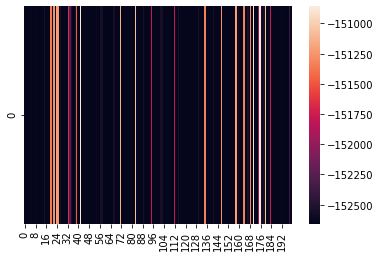

In [455]:
ps=200#pop length
#iterations=1000
cr=0.9
f=0.8
matrix=create_distance_matrix(dic)
pop_tsp=create_tsp_pop(dic,ps,matrix)
pop_knap=create_knap_pop(dic,ps)
pop_tsp_for_fit=cont_to_disc_tsp(dic,pop_tsp,matrix)
fitness=fit_loop(dic,pop_tsp_for_fit,pop_knap)
z=True
l=0
lastfit=np.amax(fitness)
count=0
while z :
    pop_tsp,pop_knap=diff_evolution(fitness,pop_tsp,pop_knap,f,cr,matrix,dic)
    pop_tsp_for_fit=cont_to_disc_tsp(dic,pop_tsp,matrix)
    fitness=fit_loop(dic,pop_tsp_for_fit,pop_knap)
    print("generation: ",l, " maximo: ", np.amax(fitness))  
    l=l+1
    
    if lastfit==np.amax(fitness):
        count=count+1
    else:
        count=0
    lastfit=np.amax(fitness)
    if count==500:
        z=False
    
p1 = sns.heatmap(np.reshape(fitness,(1,fitness.shape[0])))    